In [1]:
# import library
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")
!pip install factor_analyzer

import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis

Defaulting to user installation because normal site-packages is not writeable


data = data numerik aja (yg udh drop kolom "Kab/Kota)
data_scaled= data yg udah di standarisasi 
data_scaled= data yg udh di drop (karena nilai MSA < 0.5)
data_all= original data 


In [2]:
# import data
data = pd.read_csv('D:\KULIAH\Semester 7\Analisis Data Statistik\Final Project\dataa.csv')
data.head()

,Kab/Kota,Jml Lahir Hidup,Persentase Kunjungan Ibu Hamil K1 (%),Persentase Kunjungan Ibu Hamil K4 (%),Persalinan di Fasilitas Layanan Kesehatan (%),Persentase Ibu Hamil Mengosumsi Tablet Tambah Darah 90 (%),Jml Kematian NeoNatal + Post Neonatal + Bayi,Persentase Bayi Diberi ASI Eksklusif (%),Persentase Layanan Kesehatan Bayi (%),Persentase Imunisasi Dasar Lengkap Pada Bayi (%),Persentase Bayi Mendapat Vit A (%),Persentase Balita Gizi Buruk,Jumlah Kematian Ibu
0,KAB.PACITAN,6140,91.4,88.0,84.9,1.9,49,77.6,94.8,98.8,87.3,0.5,4
1,KAB.PONOROGO,9889,92.7,85.2,89.0,27.4,106,24.2,89.8,90.5,76.6,2.0,14
2,KAB.TRENGGALEK,8176,94.5,85.8,91.8,89.0,25,58.0,99.3,100.5,94.9,0.2,4
3,KAB.TULUNGAGUNG,14037,94.9,89.3,89.3,74.2,108,68.3,95.6,99.6,82.9,0.7,16
4,KAB.BLITAR,15435,83.8,77.2,80.2,78.7,85,57.5,83.5,90.6,91.4,1.2,17


In [3]:
# drop satu kolom pertama
data = data.drop(data.columns[:1], axis = 1)
data.head()

,Jml Lahir Hidup,Persentase Kunjungan Ibu Hamil K1 (%),Persentase Kunjungan Ibu Hamil K4 (%),Persalinan di Fasilitas Layanan Kesehatan (%),Persentase Ibu Hamil Mengosumsi Tablet Tambah Darah 90 (%),Jml Kematian NeoNatal + Post Neonatal + Bayi,Persentase Bayi Diberi ASI Eksklusif (%),Persentase Layanan Kesehatan Bayi (%),Persentase Imunisasi Dasar Lengkap Pada Bayi (%),Persentase Bayi Mendapat Vit A (%),Persentase Balita Gizi Buruk,Jumlah Kematian Ibu
0,6140,91.4,88.0,84.9,1.9,49,77.6,94.8,98.8,87.3,0.5,4
1,9889,92.7,85.2,89.0,27.4,106,24.2,89.8,90.5,76.6,2.0,14
2,8176,94.5,85.8,91.8,89.0,25,58.0,99.3,100.5,94.9,0.2,4
3,14037,94.9,89.3,89.3,74.2,108,68.3,95.6,99.6,82.9,0.7,16
4,15435,83.8,77.2,80.2,78.7,85,57.5,83.5,90.6,91.4,1.2,17


In [4]:
# check dimensi dan missing values
print(f'Dimension of data: {data.shape}')
print(f'Total Count of Missing Values: {data.isnull().sum().sum()}')

Dimension of data: (38, 12)
Total Count of Missing Values: 0


In [5]:
data.describe()

,Jml Lahir Hidup,Persentase Kunjungan Ibu Hamil K1 (%),Persentase Kunjungan Ibu Hamil K4 (%),Persalinan di Fasilitas Layanan Kesehatan (%),Persentase Ibu Hamil Mengosumsi Tablet Tambah Darah 90 (%),Jml Kematian NeoNatal + Post Neonatal + Bayi,Persentase Bayi Diberi ASI Eksklusif (%),Persentase Layanan Kesehatan Bayi (%),Persentase Imunisasi Dasar Lengkap Pada Bayi (%),Persentase Bayi Mendapat Vit A (%),Persentase Balita Gizi Buruk,Jumlah Kematian Ibu
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,14119.736842,97.402632,87.302632,92.797368,65.847368,83.447368,65.981579,93.944737,92.851316,87.389474,1.107895,13.131579
std,9572.410114,5.875625,9.557832,6.012172,26.511484,59.140098,18.267248,6.890365,16.028945,8.413207,1.067298,10.203791
min,1942.000000,83.800000,46.300000,80.200000,1.900000,2.000000,12.000000,66.200000,9.750000,56.900000,0.000000,1.000000
25%,8207.500000,94.050000,85.250000,88.775000,55.700000,48.250000,60.375000,92.550000,90.525000,85.250000,0.325000,7.250000
50%,13627.500000,98.300000,88.450000,92.250000,73.200000,75.000000,69.650000,95.600000,97.750000,87.800000,0.850000,12.500000
75%,16334.000000,100.175000,93.225000,98.500000,86.150000,116.250000,77.275000,98.100000,100.375000,94.025000,1.700000,16.750000
max,40012.000000,108.800000,100.400000,103.300000,100.000000,282.000000,93.900000,104.800000,109.300000,97.800000,5.600000,58.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Jml Lahir Hidup                                             38 non-null     int64  
 1   Persentase Kunjungan Ibu Hamil K1 (%)                       38 non-null     float64
 2   Persentase Kunjungan Ibu Hamil K4 (%)                       38 non-null     float64
 3   Persalinan di Fasilitas Layanan Kesehatan (%)               38 non-null     float64
 4   Persentase Ibu Hamil Mengosumsi Tablet Tambah Darah 90 (%)  38 non-null     float64
 5   Jml Kematian NeoNatal + Post Neonatal + Bayi                38 non-null     int64  
 6   Persentase Bayi Diberi ASI Eksklusif (%)                    38 non-null     float64
 7   Persentase Layanan Kesehatan Bayi (%)                       38 non-null     float64
 8   Pe

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
!pip install -U kaleido

In [ ]:
# cek outlier dengan boxplot
plot_rows = 4
plot_cols = 2
fig = make_subplots(rows=plot_rows, cols=plot_cols)

# add traces
x = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        #print(str(i)+ ', ' + str(j))
        fig.add_trace(go.Box(y=data[data.columns[x]].values,
                                 name = data.columns[x],
                            ),
                     row=i,
                     col=j)

        x=x+1
        if x==19:
            break

fig.update_layout(height = 1200, width = 1200)
fig.show()
fig.write_image('subplot_example_plotly.png', engine = 'kaleido')

<Axes: >

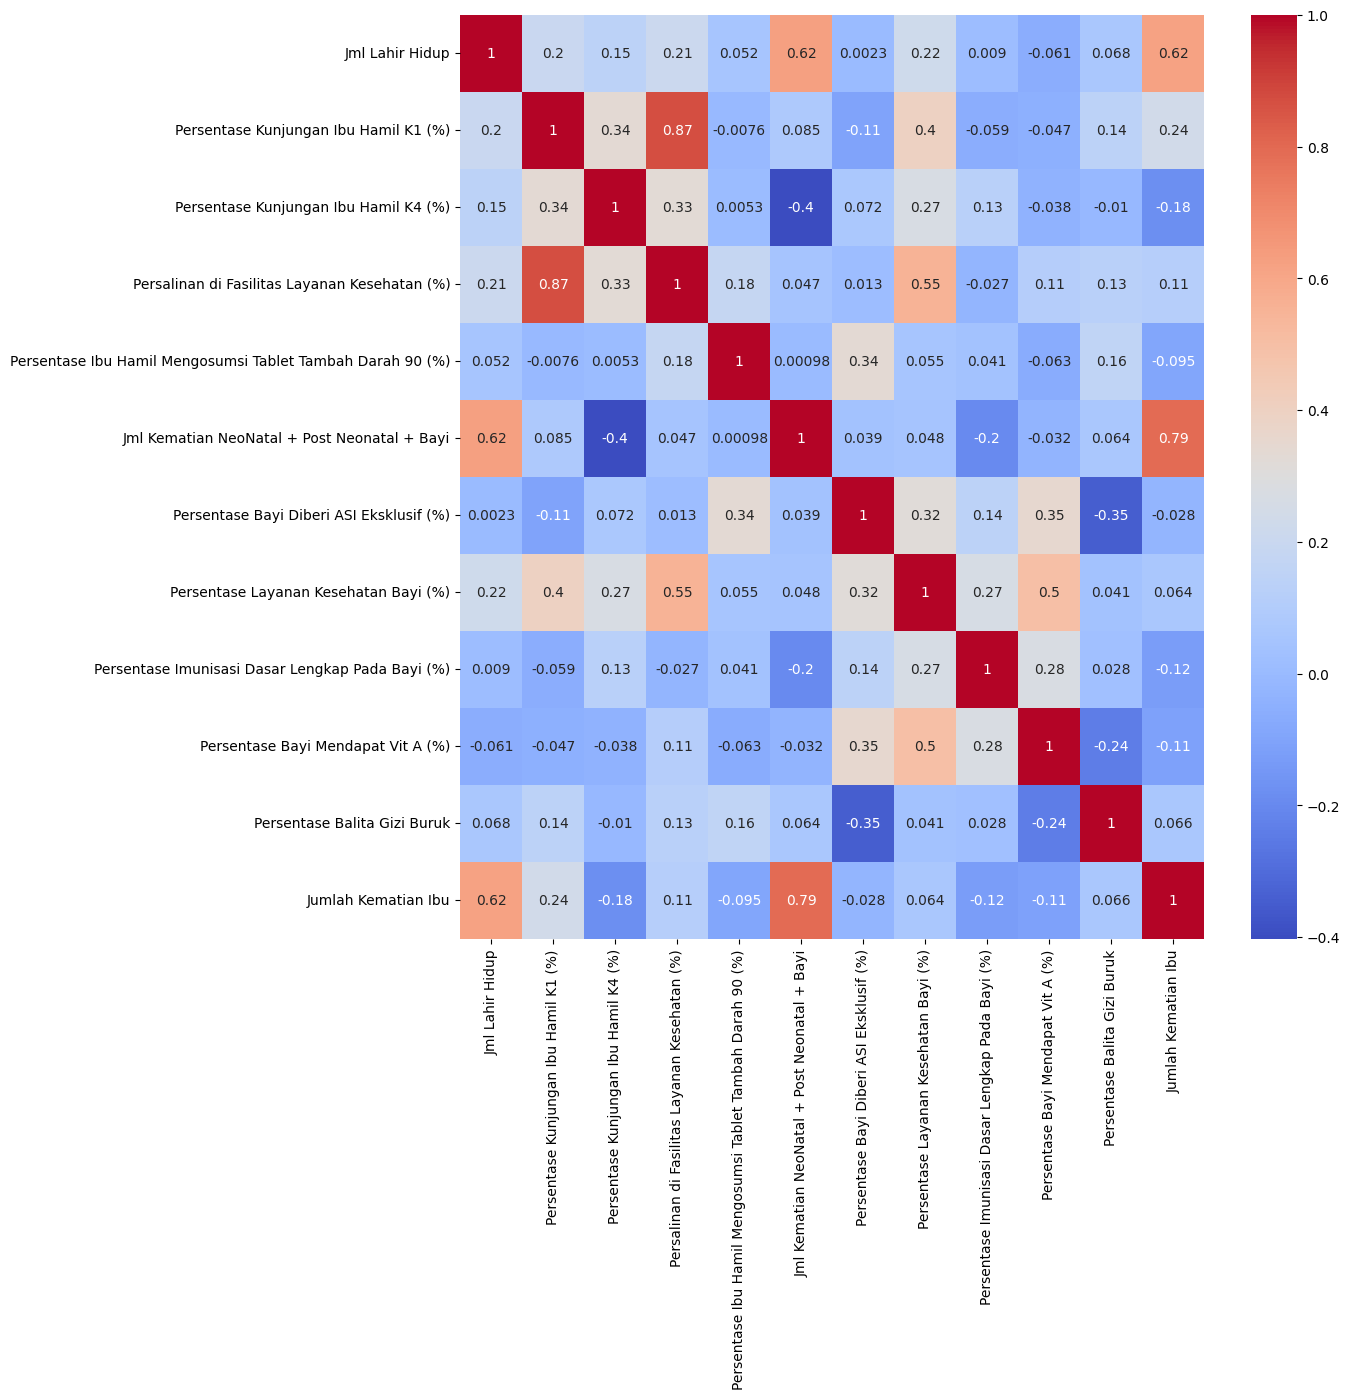

In [7]:
# cek korelasi dengan heatmap
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

In [8]:
# data scaling
data_cols = data.columns.tolist()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns = data_cols)
data_scaled.head()

,Jml Lahir Hidup,Persentase Kunjungan Ibu Hamil K1 (%),Persentase Kunjungan Ibu Hamil K4 (%),Persalinan di Fasilitas Layanan Kesehatan (%),Persentase Ibu Hamil Mengosumsi Tablet Tambah Darah 90 (%),Jml Kematian NeoNatal + Post Neonatal + Bayi,Persentase Bayi Diberi ASI Eksklusif (%),Persentase Layanan Kesehatan Bayi (%),Persentase Imunisasi Dasar Lengkap Pada Bayi (%),Persentase Bayi Mendapat Vit A (%),Persentase Balita Gizi Buruk,Jumlah Kematian Ibu
0,-0.844808,-1.035329,0.073942,-1.331196,-2.444441,-0.590289,0.644562,0.125791,0.376103,-0.010778,-0.577210,-0.906933
1,-0.447905,-0.811106,-0.222943,-0.640092,-1.469682,0.386461,-2.317942,-0.609601,-0.148661,-1.299660,0.847074,0.086250
2,-0.629259,-0.500644,-0.159325,-0.168118,0.885029,-1.001553,-0.442799,0.787643,0.483585,0.904690,-0.862066,-0.906933
3,-0.008759,-0.431652,0.211782,-0.589523,0.319286,0.420733,0.128620,0.243453,0.426683,-0.540785,-0.387305,0.284887
4,0.139246,-2.346172,-1.071189,-2.123437,0.491302,0.026606,-0.470538,-1.536194,-0.142339,0.483093,0.087456,0.384205


In [9]:
# KMO
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_scaled)
print(f'KMO Score: {kmo_model}')

KMO Score: 0.5374150258885112


In [10]:
kmo_var = pd.DataFrame(kmo_all,
                       columns = ['MSA'],
                       index = data_scaled.columns)
print(kmo_var)

                                                         MSA
Jml Lahir Hidup                                     0.573485
Persentase Kunjungan Ibu Hamil K1 (%)               0.536795
Persentase Kunjungan Ibu Hamil K4 (%)               0.443938
Persalinan di Fasilitas Layanan Kesehatan (%)       0.531549
Persentase Ibu Hamil Mengosumsi Tablet Tambah D...  0.222687
Jml Kematian NeoNatal + Post Neonatal + Bayi        0.556909
Persentase Bayi Diberi ASI Eksklusif (%)            0.438497
Persentase Layanan Kesehatan Bayi (%)               0.647114
Persentase Imunisasi Dasar Lengkap Pada Bayi (%)    0.544599
Persentase Bayi Mendapat Vit A (%)                  0.588754
Persentase Balita Gizi Buruk                        0.397758
Jumlah Kematian Ibu                                 0.705819


In [11]:
# check multikolinearitas: VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

const = add_constant(data)
vif_data = pd.Series([variance_inflation_factor(const.values, i) for i in range(const.shape[1])], index = const.columns)

print(vif_data)

const                                                         518.068570
Jml Lahir Hidup                                                 2.722920
Persentase Kunjungan Ibu Hamil K1 (%)                           6.107855
Persentase Kunjungan Ibu Hamil K4 (%)                           2.145684
Persalinan di Fasilitas Layanan Kesehatan (%)                   6.976335
Persentase Ibu Hamil Mengosumsi Tablet Tambah Darah 90 (%)      1.631194
Jml Kematian NeoNatal + Post Neonatal + Bayi                    4.834186
Persentase Bayi Diberi ASI Eksklusif (%)                        1.868282
Persentase Layanan Kesehatan Bayi (%)                           2.543564
Persentase Imunisasi Dasar Lengkap Pada Bayi (%)                1.273126
Persentase Bayi Mendapat Vit A (%)                              1.807443
Persentase Balita Gizi Buruk                                    1.396837
Jumlah Kematian Ibu                                             3.361531
dtype: float64


In [12]:
data_scaled.head()

,Jml Lahir Hidup,Persentase Kunjungan Ibu Hamil K1 (%),Persentase Kunjungan Ibu Hamil K4 (%),Persalinan di Fasilitas Layanan Kesehatan (%),Persentase Ibu Hamil Mengosumsi Tablet Tambah Darah 90 (%),Jml Kematian NeoNatal + Post Neonatal + Bayi,Persentase Bayi Diberi ASI Eksklusif (%),Persentase Layanan Kesehatan Bayi (%),Persentase Imunisasi Dasar Lengkap Pada Bayi (%),Persentase Bayi Mendapat Vit A (%),Persentase Balita Gizi Buruk,Jumlah Kematian Ibu
0,-0.844808,-1.035329,0.073942,-1.331196,-2.444441,-0.590289,0.644562,0.125791,0.376103,-0.010778,-0.577210,-0.906933
1,-0.447905,-0.811106,-0.222943,-0.640092,-1.469682,0.386461,-2.317942,-0.609601,-0.148661,-1.299660,0.847074,0.086250
2,-0.629259,-0.500644,-0.159325,-0.168118,0.885029,-1.001553,-0.442799,0.787643,0.483585,0.904690,-0.862066,-0.906933
3,-0.008759,-0.431652,0.211782,-0.589523,0.319286,0.420733,0.128620,0.243453,0.426683,-0.540785,-0.387305,0.284887
4,0.139246,-2.346172,-1.071189,-2.123437,0.491302,0.026606,-0.470538,-1.536194,-0.142339,0.483093,0.087456,0.384205


In [13]:
# drop kolom dengan MSA < 0.5
data_scaled2 = data_scaled.drop(['Persentase Kunjungan Ibu Hamil K4 (%)', 
                 'Persentase Ibu Hamil Mengosumsi Tablet Tambah Darah 90 (%)',
                 'Persentase Bayi Diberi ASI Eksklusif (%)', 
                 'Persentase Balita Gizi Buruk'], axis =1)

In [14]:
kmo_all2, kmo_model2 = calculate_kmo(data_scaled2)
kmo_var = pd.DataFrame(kmo_all2,
                       columns = ['MSA'],
                       index = data_scaled2.columns)
print(kmo_var)

                                                       MSA
Jml Lahir Hidup                                   0.763055
Persentase Kunjungan Ibu Hamil K1 (%)             0.527592
Persalinan di Fasilitas Layanan Kesehatan (%)     0.542751
Jml Kematian NeoNatal + Post Neonatal + Bayi      0.626300
Persentase Layanan Kesehatan Bayi (%)             0.665906
Persentase Imunisasi Dasar Lengkap Pada Bayi (%)  0.548736
Persentase Bayi Mendapat Vit A (%)                0.501820
Jumlah Kematian Ibu                               0.621540


In [15]:
# Bartlett Test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_sq, p = calculate_bartlett_sphericity(data)

print(f'Chi-Squared Hitung: {chi_sq}')
print(f'p-value: {p}')

Chi-Squared Hitung: 191.68391251883503
p-value: 3.460803091498234e-14


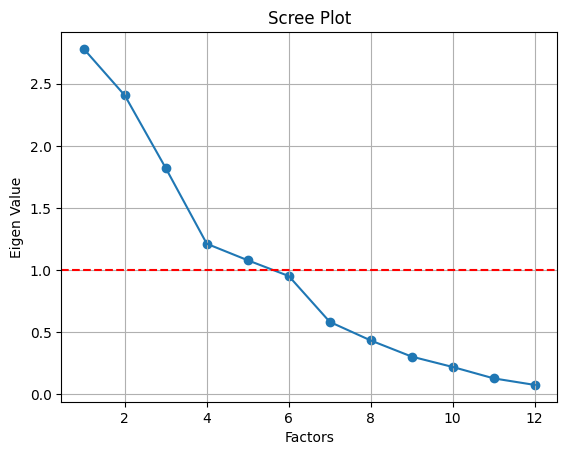

In [16]:
# FA
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation = 'varimax',
                    impute = "drop",
                    n_factors = data_scaled.shape[1])
fa.fit(data_scaled)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1, data_scaled.shape[1] + 1), ev)
plt.plot(range(1, data_scaled.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.show()

In [17]:
count = sum (1 for i in ev if i > 1)
print('Eigenvalue > 1: ', count, '. Thus, number of factors chosen is', count, '.')

Eigenvalue > 1:  5 . Thus, number of factors chosen is 5 .


In [18]:
# factor loadings
fa = FactorAnalyzer(n_factors = count,
                    rotation = 'varimax')
fa.fit(data_scaled2)

fa_load = pd.DataFrame(fa.loadings_, columns=['Factor 1','Factor 2', 'Factor 3',
                                             'Factor 4','Factor 5'],
                      index = data_scaled2.columns)

In [19]:
def highlight_max(s):
    # mendapatkan 5 nilai terbesar dari kolom
    is_large = s.nlargest(5).values
    return ['background-color: pink' if v in is_large else '' for v in s]

fa_load.sort_values(by = 'Factor 1', ascending = False).style.apply(highlight_max)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Jml Kematian NeoNatal + Post Neonatal + Bayi,0.908790,-0.027437,0.085254,-0.285630,-0.018793
Jumlah Kematian Ibu,0.860786,0.112677,-0.071492,-0.056100,-0.146962
Jml Lahir Hidup,0.756721,0.151766,-0.047956,0.173196,0.306654
Persentase Kunjungan Ibu Hamil K1 (%),0.123409,0.942424,-0.052679,-0.001496,-0.128346
Persentase Layanan Kesehatan Bayi (%),0.107945,0.462621,0.589990,0.298153,0.153284
Persalinan di Fasilitas Layanan Kesehatan (%),0.046595,0.950397,0.172564,-0.067400,0.163018
Persentase Bayi Mendapat Vit A (%),-0.054657,-0.003721,0.777602,0.172208,-0.038533
Persentase Imunisasi Dasar Lengkap Pada Bayi (%),-0.084387,-0.035338,0.240335,0.494034,0.013529


### clustering based on FA 

In [20]:
data_all= pd.read_csv("D:\KULIAH\Semester 7\Analisis Data Statistik\Final Project\Data.csv")
data_all.head()

,Kab/Kota,Jml Lahir Hidup,Persentase Kunjungan Ibu Hamil K1 (%),Persentase Kunjungan Ibu Hamil K4 (%),Persalinan di Fasilitas Layanan Kesehatan (%),Persentase Ibu Hamil Mengosumsi Tablet Tambah Darah 90 (%),Jml Kematian NeoNatal + Post Neonatal + Bayi,Persentase Bayi Diberi ASI Eksklusif (%),Persentase Layanan Kesehatan Bayi (%),Persentase Imunisasi Dasar Lengkap Pada Bayi (%),Persentase Bayi Mendapat Vit A (%),Persentase Balita Gizi Buruk,Jumlah Kematian Ibu,Persentase Kunjungan Ibu Hamil K6 (%),Persentasse Bayi Kunjungan Neonatal 3 kali,Persentase Pelayanan Kesehatan Bayi
0,KAB.PACITAN,6140,91.4,88.0,84.9,1.9,49,77.6,94.8,98.8,87.3,0.5,4,59.5,86.8,94.8
1,KAB.PONOROGO,9889,92.7,85.2,89.0,27.4,106,24.2,89.8,90.5,76.6,2.0,14,60.3,92.4,89.8
2,KAB.TRENGGALEK,8176,94.5,85.8,91.8,89.0,25,58.0,99.3,100.5,94.9,0.2,4,80.9,97.1,99.3
3,KAB.TULUNGAGUNG,14037,94.9,89.3,89.3,74.2,108,68.3,95.6,99.6,82.9,0.7,16,85.9,92.0,95.6
4,KAB.BLITAR,15435,83.8,77.2,80.2,78.7,85,57.5,83.5,90.6,91.4,1.2,17,65.9,83.8,83.5


In [21]:
data_wilayah= data_all.set_index('Kab/Kota')
data_wilayah.head()

,Jml Lahir Hidup,Persentase Kunjungan Ibu Hamil K1 (%),Persentase Kunjungan Ibu Hamil K4 (%),Persalinan di Fasilitas Layanan Kesehatan (%),Persentase Ibu Hamil Mengosumsi Tablet Tambah Darah 90 (%),Jml Kematian NeoNatal + Post Neonatal + Bayi,Persentase Bayi Diberi ASI Eksklusif (%),Persentase Layanan Kesehatan Bayi (%),Persentase Imunisasi Dasar Lengkap Pada Bayi (%),Persentase Bayi Mendapat Vit A (%),Persentase Balita Gizi Buruk,Jumlah Kematian Ibu,Persentase Kunjungan Ibu Hamil K6 (%),Persentasse Bayi Kunjungan Neonatal 3 kali,Persentase Pelayanan Kesehatan Bayi
Kab/Kota,,,,,,,,,,,,,,,
KAB.PACITAN,6140,91.4,88.0,84.9,1.9,49,77.6,94.8,98.8,87.3,0.5,4,59.5,86.8,94.8
KAB.PONOROGO,9889,92.7,85.2,89.0,27.4,106,24.2,89.8,90.5,76.6,2.0,14,60.3,92.4,89.8
KAB.TRENGGALEK,8176,94.5,85.8,91.8,89.0,25,58.0,99.3,100.5,94.9,0.2,4,80.9,97.1,99.3
KAB.TULUNGAGUNG,14037,94.9,89.3,89.3,74.2,108,68.3,95.6,99.6,82.9,0.7,16,85.9,92.0,95.6
KAB.BLITAR,15435,83.8,77.2,80.2,78.7,85,57.5,83.5,90.6,91.4,1.2,17,65.9,83.8,83.5


In [22]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [23]:
my_label = data_wilayah.index
my_label

Index(['KAB.PACITAN', 'KAB.PONOROGO', 'KAB.TRENGGALEK', 'KAB.TULUNGAGUNG',
       'KAB.BLITAR', 'KAB.KEDIRI', 'KAB.MALANG', 'KAB.LUMAJANG', 'KAB.JEMBER',
       'KAB.BANYUWANGI', 'KAB.BONDOWOSO', 'KAB.SITUBONDO', 'KAB.PROBOLINGGO',
       'KAB.PASURUAN', 'KAB.SIDOARJO', 'KAB.MOJOKERTO', 'KAB.JOMBANG',
       'KAB.NGANJUK', 'KAB.MADIUN', 'KAB.MAGETAN', 'KAB.NGAWI',
       'KAB.BOJONEGORO', 'KAB.TUBAN', 'KAB.LAMONGAN', 'KAB.GRESIK',
       'KAB.BANGKALAN', 'KAB.SAMPANG', 'KAB.PAMEKASAN', 'KAB.SUMENEP',
       'KOTA KEDIRI', 'KOTA BLITAR', 'KOTA MALANG', 'KOTA PROBOLINGGO ',
       'KOTA PASURUAN', 'KOTA MOJOKERTO', 'KOTA MADIUN', 'KOTA SURABAYA',
       'KOTA BATU'],
      dtype='object', name='Kab/Kota')

In [24]:
label = {i: value for i, value in enumerate(my_label)}
label

{0: 'KAB.PACITAN',
 1: 'KAB.PONOROGO',
 2: 'KAB.TRENGGALEK',
 3: 'KAB.TULUNGAGUNG',
 4: 'KAB.BLITAR',
 5: 'KAB.KEDIRI',
 6: 'KAB.MALANG',
 7: 'KAB.LUMAJANG',
 8: 'KAB.JEMBER',
 9: 'KAB.BANYUWANGI',
 10: 'KAB.BONDOWOSO',
 11: 'KAB.SITUBONDO',
 12: 'KAB.PROBOLINGGO',
 13: 'KAB.PASURUAN',
 14: 'KAB.SIDOARJO',
 15: 'KAB.MOJOKERTO',
 16: 'KAB.JOMBANG',
 17: 'KAB.NGANJUK',
 18: 'KAB.MADIUN',
 19: 'KAB.MAGETAN',
 20: 'KAB.NGAWI',
 21: 'KAB.BOJONEGORO',
 22: 'KAB.TUBAN',
 23: 'KAB.LAMONGAN',
 24: 'KAB.GRESIK',
 25: 'KAB.BANGKALAN',
 26: 'KAB.SAMPANG',
 27: 'KAB.PAMEKASAN',
 28: 'KAB.SUMENEP',
 29: 'KOTA KEDIRI',
 30: 'KOTA BLITAR',
 31: 'KOTA MALANG',
 32: 'KOTA PROBOLINGGO ',
 33: 'KOTA PASURUAN',
 34: 'KOTA MOJOKERTO',
 35: 'KOTA MADIUN',
 36: 'KOTA SURABAYA',
 37: 'KOTA BATU'}

In [25]:
data_fa = pd.DataFrame(fa.transform(data_scaled2), columns = ['F1','F2','F3','F4','F5'])
data_fa = pd.concat([data_all['Kab/Kota'], data_fa] ,axis=1)
data_fa

,Kab/Kota,F1,F2,F3,F4,F5
0,KAB.PACITAN,-0.618903,-1.176562,0.124467,0.465974,-0.395381
1,KAB.PONOROGO,0.123347,-0.706357,-0.562887,-0.671465,0.197983
2,KAB.TRENGGALEK,-0.904966,-0.273100,0.811570,0.581512,0.209454
3,KAB.TULUNGAGUNG,0.405203,-0.543346,-0.087904,0.157865,-0.156147
4,KAB.BLITAR,0.206508,-2.271661,-0.071516,0.140911,0.145234
5,KAB.KEDIRI,0.742416,-1.772836,-0.554629,0.620675,-0.419972
6,KAB.MALANG,0.591236,0.614807,-0.516464,1.340455,1.307105
7,KAB.LUMAJANG,0.000281,0.949097,0.220347,-2.113755,0.208425
8,KAB.JEMBER,3.691997,-0.142300,0.436724,0.028520,-1.518070
9,KAB.BANYUWANGI,0.900891,0.483570,0.732663,-0.104563,0.235030


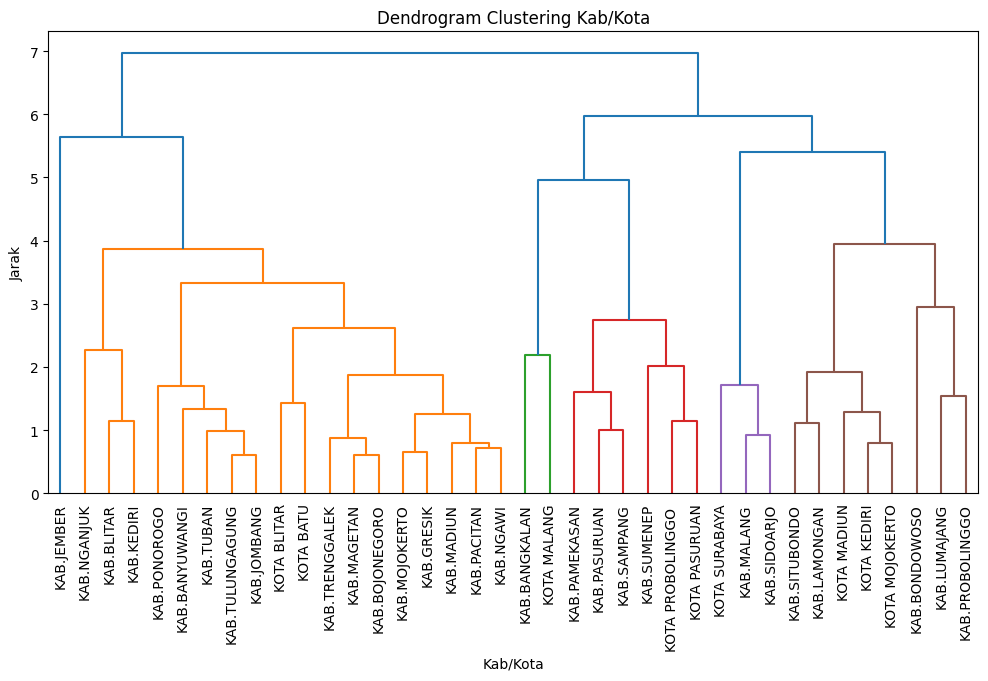

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy


# Mengambil subset data untuk clustering
data_for_clustering = data_fa[['F1', 'F2', 'F3', 'F4', 'F5']]

# Menghitung matriks jarak dengan menggunakan metrik Euclidean
distance_matrix = hierarchy.linkage(data_for_clustering, method='ward')

# Menampilkan dendrogram
plt.figure(figsize=(12, 6))
dendrogram = hierarchy.dendrogram(distance_matrix, labels=data_fa['Kab/Kota'].tolist(), leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram Clustering Kab/Kota')
plt.xlabel('Kab/Kota')
plt.ylabel('Jarak')
plt.show()

In [27]:
cl = AgglomerativeClustering(n_clusters = 6, affinity='euclidean', linkage='ward')
cl.fit_predict(data_fa[['F1','F2','F3','F4','F5']])

array([1, 1, 1, 1, 1, 1, 4, 0, 3, 1, 0, 0, 0, 2, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 5, 2, 2, 2, 0, 1, 5, 2, 2, 0, 0, 4, 1], dtype=int64)

In [28]:
segment = pd.Series(cl.labels_, name=('cluster wilayah'))
segment_wilayah= pd.concat([data_fa, segment], axis=1)
segment_wilayah

,Kab/Kota,F1,F2,F3,F4,F5,cluster wilayah
0,KAB.PACITAN,-0.618903,-1.176562,0.124467,0.465974,-0.395381,1
1,KAB.PONOROGO,0.123347,-0.706357,-0.562887,-0.671465,0.197983,1
2,KAB.TRENGGALEK,-0.904966,-0.273100,0.811570,0.581512,0.209454,1
3,KAB.TULUNGAGUNG,0.405203,-0.543346,-0.087904,0.157865,-0.156147,1
4,KAB.BLITAR,0.206508,-2.271661,-0.071516,0.140911,0.145234,1
5,KAB.KEDIRI,0.742416,-1.772836,-0.554629,0.620675,-0.419972,1
6,KAB.MALANG,0.591236,0.614807,-0.516464,1.340455,1.307105,4
7,KAB.LUMAJANG,0.000281,0.949097,0.220347,-2.113755,0.208425,0
8,KAB.JEMBER,3.691997,-0.142300,0.436724,0.028520,-1.518070,3
9,KAB.BANYUWANGI,0.900891,0.483570,0.732663,-0.104563,0.235030,1


In [29]:
# cluster dendogram dengan "ward"
cluster_0_members = segment_wilayah[segment_wilayah['cluster wilayah'] == 0]['Kab/Kota'].tolist()
cluster_1_members = segment_wilayah[segment_wilayah['cluster wilayah'] == 1]['Kab/Kota'].tolist()
cluster_2_members = segment_wilayah[segment_wilayah['cluster wilayah'] == 2]['Kab/Kota'].tolist()
cluster_3_members = segment_wilayah[segment_wilayah['cluster wilayah'] == 3]['Kab/Kota'].tolist()
cluster_4_members = segment_wilayah[segment_wilayah['cluster wilayah'] == 4]['Kab/Kota'].tolist()
cluster_5_members = segment_wilayah[segment_wilayah['cluster wilayah'] == 5]['Kab/Kota'].tolist()

print("Anggota Kluster 0:", cluster_0_members)
print("Anggota Kluster 1:", cluster_1_members)
print("Anggota Kluster 2:", cluster_2_members)
print("Anggota Kluster 3:", cluster_3_members)
print("Anggota Kluster 4:", cluster_4_members)
print("Anggota Kluster 5:", cluster_5_members)

Anggota Kluster 0: ['KAB.LUMAJANG', 'KAB.BONDOWOSO', 'KAB.SITUBONDO', 'KAB.PROBOLINGGO', 'KAB.LAMONGAN', 'KOTA KEDIRI', 'KOTA MOJOKERTO', 'KOTA MADIUN']
Anggota Kluster 1: ['KAB.PACITAN', 'KAB.PONOROGO', 'KAB.TRENGGALEK', 'KAB.TULUNGAGUNG', 'KAB.BLITAR', 'KAB.KEDIRI', 'KAB.BANYUWANGI', 'KAB.MOJOKERTO', 'KAB.JOMBANG', 'KAB.NGANJUK', 'KAB.MADIUN', 'KAB.MAGETAN', 'KAB.NGAWI', 'KAB.BOJONEGORO', 'KAB.TUBAN', 'KAB.GRESIK', 'KOTA BLITAR', 'KOTA BATU']
Anggota Kluster 2: ['KAB.PASURUAN', 'KAB.SAMPANG', 'KAB.PAMEKASAN', 'KAB.SUMENEP', 'KOTA PROBOLINGGO ', 'KOTA PASURUAN']
Anggota Kluster 3: ['KAB.JEMBER']
Anggota Kluster 4: ['KAB.MALANG', 'KAB.SIDOARJO', 'KOTA SURABAYA']
Anggota Kluster 5: ['KAB.BANGKALAN', 'KOTA MALANG']


##Clustering (kalo dimampetin clusternya)

In [30]:
data_scaled2.head()

,Jml Lahir Hidup,Persentase Kunjungan Ibu Hamil K1 (%),Persalinan di Fasilitas Layanan Kesehatan (%),Jml Kematian NeoNatal + Post Neonatal + Bayi,Persentase Layanan Kesehatan Bayi (%),Persentase Imunisasi Dasar Lengkap Pada Bayi (%),Persentase Bayi Mendapat Vit A (%),Jumlah Kematian Ibu
0,-0.844808,-1.035329,-1.331196,-0.590289,0.125791,0.376103,-0.010778,-0.906933
1,-0.447905,-0.811106,-0.640092,0.386461,-0.609601,-0.148661,-1.299660,0.086250
2,-0.629259,-0.500644,-0.168118,-1.001553,0.787643,0.483585,0.904690,-0.906933
3,-0.008759,-0.431652,-0.589523,0.420733,0.243453,0.426683,-0.540785,0.284887
4,0.139246,-2.346172,-2.123437,0.026606,-1.536194,-0.142339,0.483093,0.384205


In [31]:
# matriks var covar 

cov_matrics=np.cov(data_scaled2.T)
cov_matrics

array([[ 1.02702703,  0.2047109 ,  0.21520244,  0.64108566,  0.22825059,
         0.00920901, -0.06286012,  0.63380004],
       [ 0.2047109 ,  1.02702703,  0.89506932,  0.08693103,  0.40886677,
        -0.0604443 , -0.04778468,  0.24148556],
       [ 0.21520244,  0.89506932,  1.02702703,  0.04844398,  0.56630826,
        -0.0278687 ,  0.11319339,  0.11778319],
       [ 0.64108566,  0.08693103,  0.04844398,  1.02702703,  0.0489516 ,
        -0.2019097 , -0.03259778,  0.81327524],
       [ 0.22825059,  0.40886677,  0.56630826,  0.0489516 ,  1.02702703,
         0.27289017,  0.51001409,  0.06532993],
       [ 0.00920901, -0.0604443 , -0.0278687 , -0.2019097 ,  0.27289017,
         1.02702703,  0.28364841, -0.12684418],
       [-0.06286012, -0.04778468,  0.11319339, -0.03259778,  0.51001409,
         0.28364841,  1.02702703, -0.10995031],
       [ 0.63380004,  0.24148556,  0.11778319,  0.81327524,  0.06532993,
        -0.12684418, -0.10995031,  1.02702703]])

In [32]:
# calculate eigen values

eign_values , eign_vect = np.linalg.eig(cov_matrics)
print ( "Eigen Values:\n" , eign_values)
print('\n Eigen vectors : \n',eign_vect)

Eigen Values:
 [2.79532739 2.14855719 1.42281247 0.80094089 0.44715172 0.30983185
 0.09379865 0.19779605]

 Eigen vectors : 
 [[-0.44246973 -0.23522241 -0.20920829 -0.22452288 -0.65302676  0.45232896
  -0.07122089  0.13636155]
 [-0.41258569  0.28872061  0.43774176 -0.13356259  0.28297493  0.15749328
  -0.64892783  0.1047395 ]
 [-0.40943717  0.38634338  0.34720308 -0.01151694  0.02970234  0.17917988
   0.68614648 -0.24214194]
 [-0.40705743 -0.40209162 -0.2114868   0.16890521  0.22204387 -0.10608804
  -0.14265733 -0.72004284]
 [-0.31971544  0.44957057 -0.2419755   0.14548346 -0.36945639 -0.68232855
  -0.10960764  0.04320469]
 [ 0.03893599  0.28803446 -0.49186885 -0.7603241   0.2718849   0.02293751
   0.02928507 -0.14208197]
 [-0.05037963  0.3645253  -0.52992623  0.55036579  0.23145429  0.45863526
  -0.04455056  0.12229778]
 [-0.44089336 -0.36388969 -0.13427019 -0.03046671  0.42344423 -0.22536546
   0.26041493  0.5969339 ]]


In [33]:
total = sum( eign_values )
var_exp = [ ( i / total ) * 100 for i in sorted ( eign_values , reverse = True ) ]
cum_var_exp = np.cumsum ( var_exp )
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 34.02207684  60.17227945  77.48940485  87.23769857  92.68000574
  96.45098553  98.85837171 100.        ]


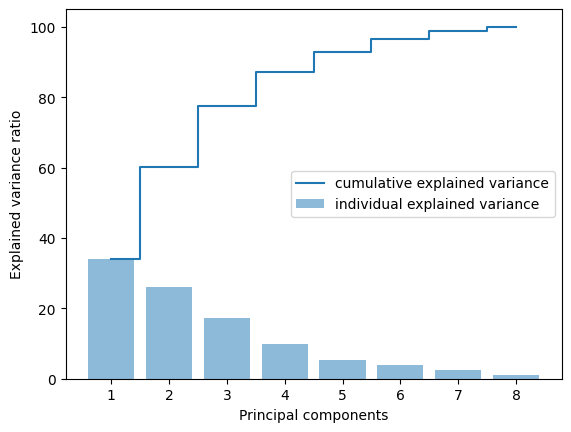

In [35]:
plt.bar(range(1,eign_values.size + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,eign_values.size + 1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [36]:
#### KMeans without PCA:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

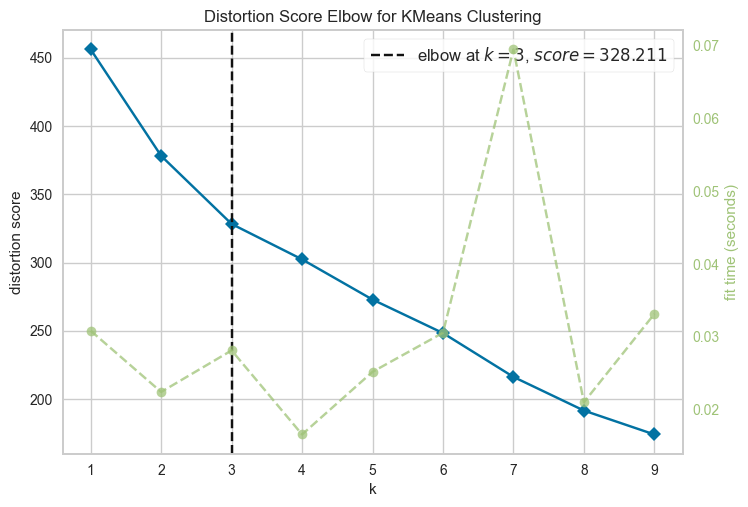

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# elbow method (alternative, to see the optimal k)
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model =KMeans(random_state = 100)

elbow_visualizer = KElbowVisualizer(model, k=(1,10))
elbow_visualizer.fit(data_scaled)
elbow_visualizer.show()

In [38]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_scaled)


KMeans(n_clusters=3)

In [39]:
kmeans.labels_

array([0, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [40]:
data_scaled2['Labels']=kmeans.labels_

In [41]:
data_scaled2['Labels']

0     0
1     2
2     0
3     0
4     0
5     0
6     1
7     2
8     1
9     1
10    1
11    1
12    1
13    2
14    1
15    0
16    1
17    0
18    0
19    0
20    0
21    1
22    1
23    1
24    0
25    2
26    2
27    2
28    2
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    1
37    0
Name: Labels, dtype: int32

In [42]:
# jumalh anggota tiap cluster
data_scaled2['Labels'].value_counts()

Labels
0    19
1    12
2     7
Name: count, dtype: int64

In [43]:
data_cluster_no_pca= pd.concat([data_scaled2['Labels'], data_fa['Kab/Kota']], axis= 1)
data_cluster_no_pca

,Labels,Kab/Kota
0,0,KAB.PACITAN
1,2,KAB.PONOROGO
2,0,KAB.TRENGGALEK
3,0,KAB.TULUNGAGUNG
4,0,KAB.BLITAR
5,0,KAB.KEDIRI
6,1,KAB.MALANG
7,2,KAB.LUMAJANG
8,1,KAB.JEMBER
9,1,KAB.BANYUWANGI


In [44]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df_AC = data_scaled2.drop('Labels', axis=1).copy(deep=True)
cluster2 = hie_clus.fit_predict(df_AC)


df_AC['label'] = cluster2

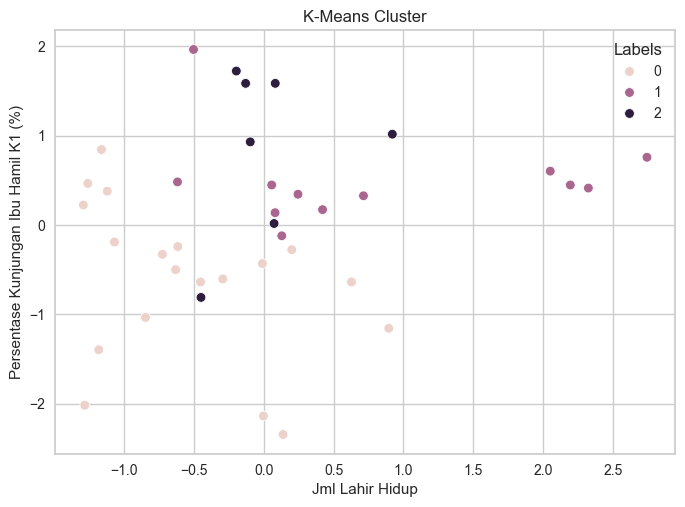

In [45]:
### PLOTTING: WITHOUT PCA

plt.title('K-Means Cluster')
sns.scatterplot(x='Jml Lahir Hidup', y='Persentase Kunjungan Ibu Hamil K1 (%)', hue='Labels', data=data_scaled2)
plt.show()

In [46]:
pca= PCA(n_components=4)
pca_result = pca.fit_transform(df_AC)
pca_df= pd.DataFrame(pca_result, columns= ['PC1', 'PC2', 'PC3', 'PC4'])
pca_df.head()

,PC1,PC2,PC3,PC4
0,-2.271570,0.087803,-0.610460,-0.025154
1,-0.222432,1.567084,0.477868,-0.483646
2,-1.635515,-1.413601,-0.647595,0.301858
3,0.335560,0.665582,-0.380839,-0.533155
4,-1.744970,2.472670,-1.558972,0.370132


In [47]:
pca_df.shape

(38, 4)

In [49]:
#Optimal clusters are k = 3
km= KMeans(n_clusters=3)
km.fit(pca_df)
pca_df['Labels']=km.labels_

In [50]:
km.labels_

array([2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2,
       1, 1, 2, 0, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2])

In [51]:
# jumlah anggota setiap cluster
pca_df['Labels'].value_counts()

Labels
1    17
2    14
0     7
Name: count, dtype: int64

In [52]:
data_cluster_with_pca= pd.concat([pca_df['Labels'], data_fa['Kab/Kota']], axis= 1)
data_cluster_with_pca

,Labels,Kab/Kota
0,2,KAB.PACITAN
1,0,KAB.PONOROGO
2,2,KAB.TRENGGALEK
3,1,KAB.TULUNGAGUNG
4,0,KAB.BLITAR
5,0,KAB.KEDIRI
6,1,KAB.MALANG
7,1,KAB.LUMAJANG
8,1,KAB.JEMBER
9,1,KAB.BANYUWANGI


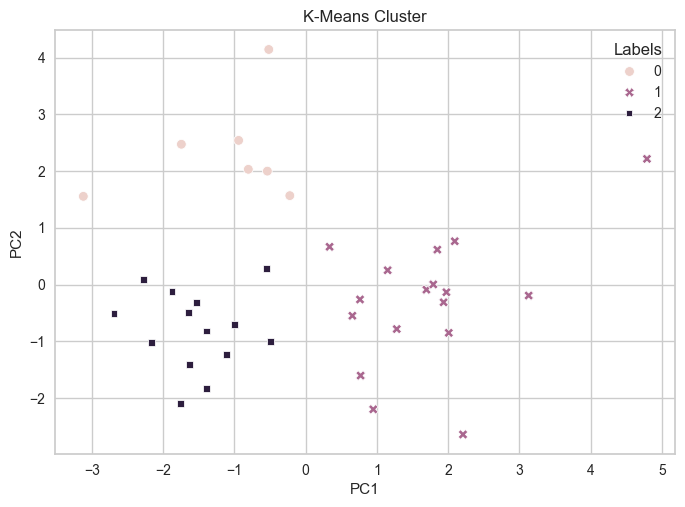

In [53]:
plt.title('K-Means Cluster')
sns.scatterplot(x='PC1', y='PC2', hue='Labels', style='Labels', data=pca_df)
# Set the background color to white (or any other color you prefer)
plt.gca().set_facecolor('white')
plt.show()